# **Intern Name - Muskaan Shakil Shaikh**
The Sparks Foundation




**Task 1 : Prediction Using Supervised ML**




**Data Source**: http://bit.ly/w-data

**Problem Statement : To predict the percentage of a student based on the number of study hours**

**Step1: Importing libraries we require using import keyword**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
print("Installed properly")

Installed properly


Numpy library is used for working with array. Pandas library is used for cleaning and analysis purpose. matplotlib.pyplot is for data visualization in 2D in python.


***Step 2: Importing the dataset***

In [ ]:
url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


csv denotes "comma separated values". head(10) means the initial 10 values of dataset

 **Step 3: Visualizing the data using scatter plot. Scatter is the built-in function present in matplotlib.****

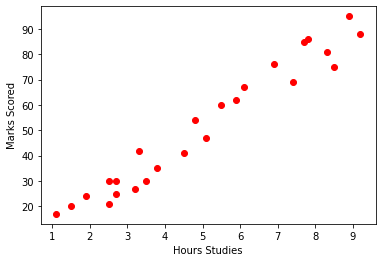

In [ ]:
plt.scatter(dataset['Hours'],dataset['Scores'],color="red")
plt.xlabel('Hours Studies')
plt.ylabel('Marks Scored')
plt.show()

From the graph we can see that number of hours studied is directly proportional to the marks scored as it is linear.

*Step 4: Splitting the data into x and y*

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

x stores values of all rows and all the columns except the last column .
y stores values of all rows and only the last column.




In [ ]:
x


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Step 5: ***Splitting the data into training set and testing set.***

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

In [ ]:
x_train

array([[1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [ ]:
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5],
       [5.1]])

In [ ]:
y_train

array([17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86, 88, 24, 62])

In [ ]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75, 47])

 *Step 6: **LINEAR REGRESSION:** The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable).*

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
#Training the model using fit()
LR.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the regression line.

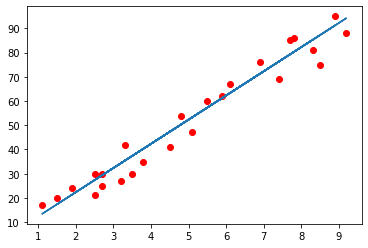

In [ ]:
line = LR.coef_*x+LR.intercept_
plt.scatter(x,y,color="red")
plt.plot(x,line)
plt.show()

*Step 7: Predicting on x_test*

In [ ]:
y_pred_LR=LR.predict(x_test)

In [ ]:
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5],
       [5.1]])

In [ ]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75, 47])

In [ ]:
#predicted values over x_test are as follows
y_pred_LR

array([27.35418824, 79.25993656, 40.33062532, 76.26537416, 57.29981227,
       50.3125    , 34.34150052, 87.2454363 , 53.3070624 ])

*Step 8: Looking into the difference between the actual data and predicted data.*

In [ ]:
diff_LR=y_test-y_pred_LR

In [ ]:
result_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
result_df.columns=['Predicted score','Original score','Difference']
result_df

,Predicted score,Original score,Difference
0,27.354188,30,2.645812
1,79.259937,85,5.740063
2,40.330625,35,-5.330625
3,76.265374,69,-7.265374
4,57.299812,60,2.700188
5,50.312500,54,3.687500
6,34.341501,27,-7.341501
7,87.245436,75,-12.245436
8,53.307062,47,-6.307062


In [ ]:
#considering own input:
hours = [[7.5]]
own_pred = LR.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = [[7.5]]
Predicted Score = 77.26356162610045


Step 9: Finding the mean absolute error.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_pred_LR))

Mean Absolute Error: 5.918173514011162
